# Jacobi Function Original

/tmp/ipykernel_839/1991668203.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/1991668203.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/1991668203.py:17: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/home/wattie/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  

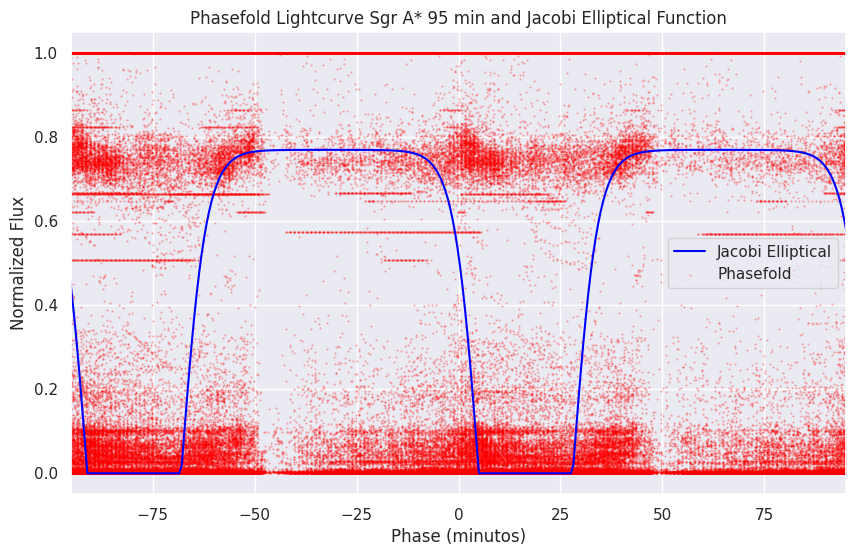

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')


# Archivos de entrada
archivo_linea = "output_95min.dat"
# archivo_linea = "jacobi_0.86_E79.17_S18.19_m0.81_W4.0_desplazamiento5.0.dat"
archivo_scatter = "phasefolding_periodicidad_191.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 164

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
plt.plot(data_linea['x'], data_linea['y'], label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.3, alpha=0.3)

# Etiquetas y título
plt.xlabel("Phase (minutos)")
plt.ylabel("Normalized Flux")
plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-95,95)

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
# plt.savefig("phasefold_jacobi_95min_sample1.png", format='png', dpi=300)
plt.show()

#Ingresa la amplitud del eclipse:
#0.77
#Ingresa el periodo del eclipse:
#73
#Ingresa el periodo no eclipsado:
#23
#Ingresa el traslado vertical:
#0
#Ingresa el número de eclipses:
#4
#Ingresa la resolución:
#0.1
#Ingresa el módulo (0<m<1):
#0.9999


# Jacobi Function Eclipse Model

# 1 Periodo

/tmp/ipykernel_21214/1737232685.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/1737232685.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/1737232685.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


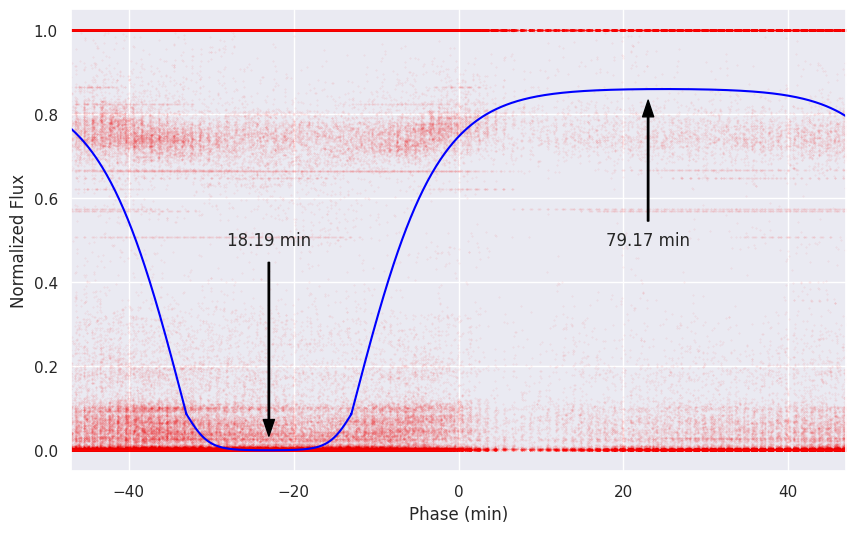

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_0.86_E76.0_S20.0_m0.99_W10.0_desplazamiento10.0.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "variacion_periodicidad/phasefolding_periodicidad_95.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 205

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=.1)

# Añadir una flecha con un número apuntando a una coordenada específica
plt.annotate(
    '79.17 min',  # El número que quieres mostrar
    xy=(23, 0.85),  # Coordenadas de la flecha
    xytext=(23, 0.5),  # Posición del texto
    ha='center',  # Horizontally align text in the center
    va='center',  # Vertically align text in the center
    arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, width=1, headwidth=8, lw=1)
)

# Añadir una flecha con un número apuntando a una coordenada específica
plt.annotate(
    '18.19 min',  # El número que quieres mostrar
    xy=(-23, 0.01),  # Coordenadas de la flecha
    xytext=(-23, 0.5),  # Posición del texto
    ha='center',  # Horizontally align text in the center
    va='center',  # Vertically align text in the center
    arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, width=1, headwidth=8, lw=1)
)


# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-47, 47)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_jacobi_1_periods_sample1.png", format='png', dpi=300)

plt.show()


/tmp/ipykernel_839/3982170779.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/3982170779.py:12: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


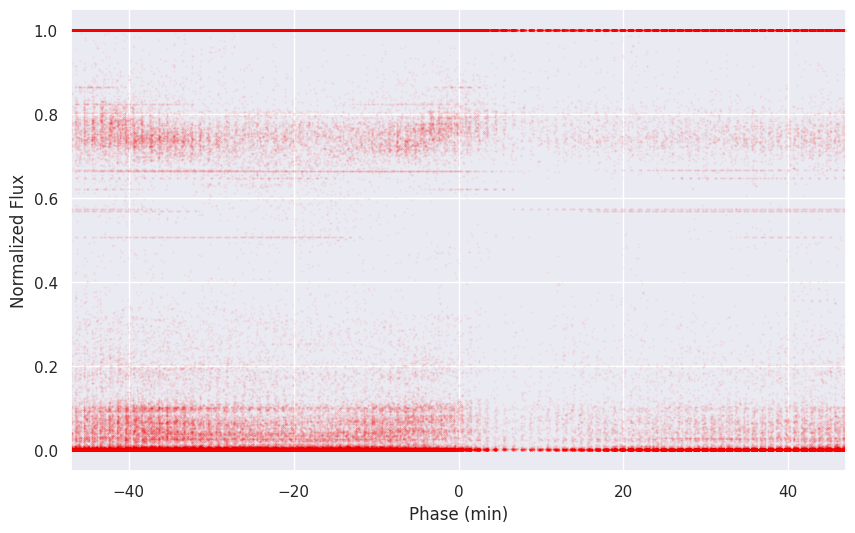

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Archivos de entrada
# archivo_linea = "output_95min.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "variacion_periodicidad/phasefolding_periodicidad_95.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
# data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
# data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
# data_linea['x'] = data_linea['x'] - 158

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# plt.plot(data_linea['x'], data_linea['y'], label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=0.1)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
# plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-47,47)

# Añadir leyenda
# plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_scater_1_periods_sample1.png", format='png', dpi=300)
plt.show()



# 2 Periodos

/tmp/ipykernel_839/3175302475.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/3175302475.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/3175302475.py:15: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


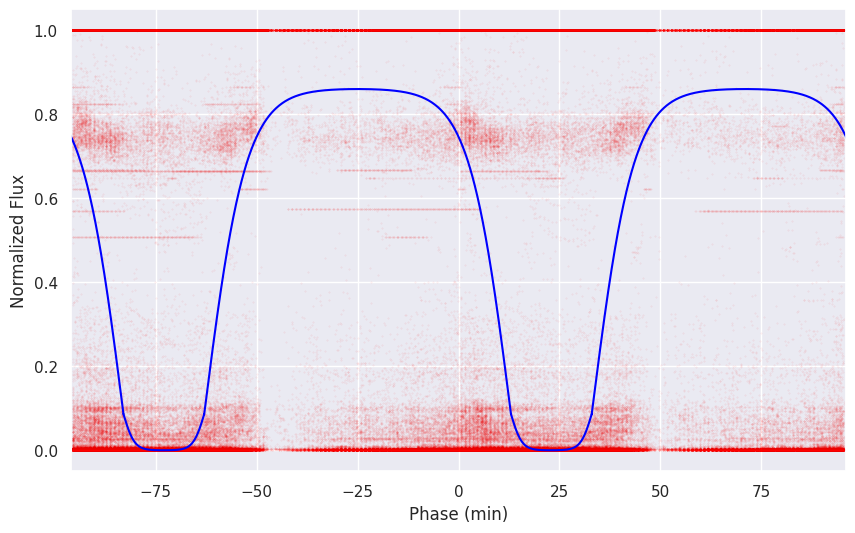

In [152]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_0.86_E76.0_S20.0_m0.99_W10.0_desplazamiento10.0.dat"
archivo_scatter = "phasefolding_periodicidad_191.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 255

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=.1)


# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-96, 96)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_jacobi_2_periods_sample1.png", format='png', dpi=300)

plt.show()


/tmp/ipykernel_839/2064606584.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/2064606584.py:11: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


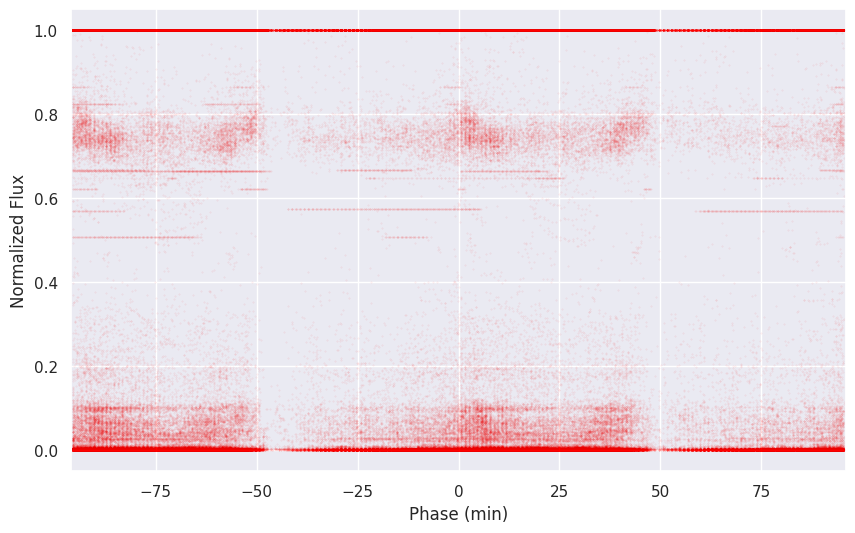

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Archivos de entrada
# archivo_linea = "output_95min.dat"
archivo_scatter = "phasefolding_periodicidad_191.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
# data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
# data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
# data_linea['x'] = data_linea['x'] - 158

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# plt.plot(data_linea['x'], data_linea['y'], label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=0.1)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
# plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-96,96)

# Añadir leyenda
# plt.legend()

# Mostrar la gráfica
#plt.savefig("images/phasefold_scater_2_periods_sample1.png", format='png', dpi=300)
plt.show()



# 4 Periodos

/tmp/ipykernel_839/2589634908.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/2589634908.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/2589634908.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


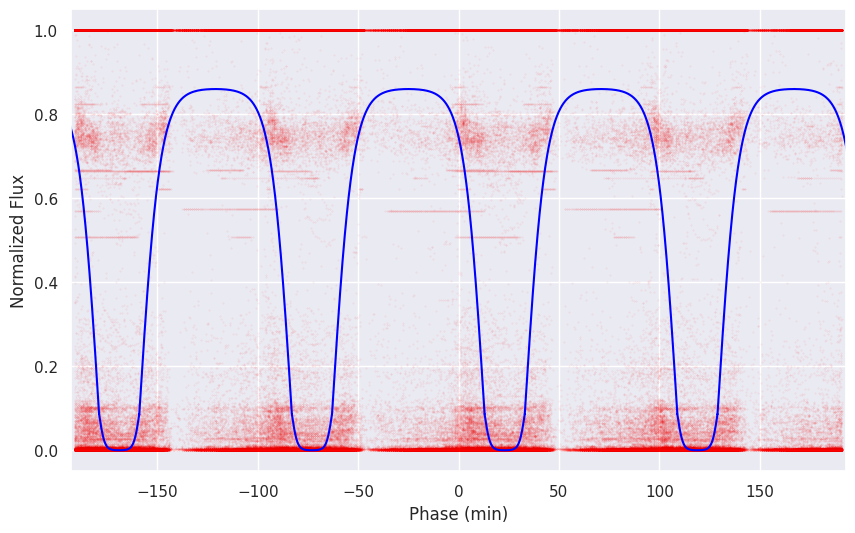

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_0.86_E76.0_S20.0_m0.99_W10.0_desplazamiento10.0.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "variacion_periodicidad/phasefolding_periodicidad_382.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 255

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=.1)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-193,193)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_jacobi_4_periods_sample1.png", format='png', dpi=300)

plt.show()


/tmp/ipykernel_839/2363686226.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/2363686226.py:12: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


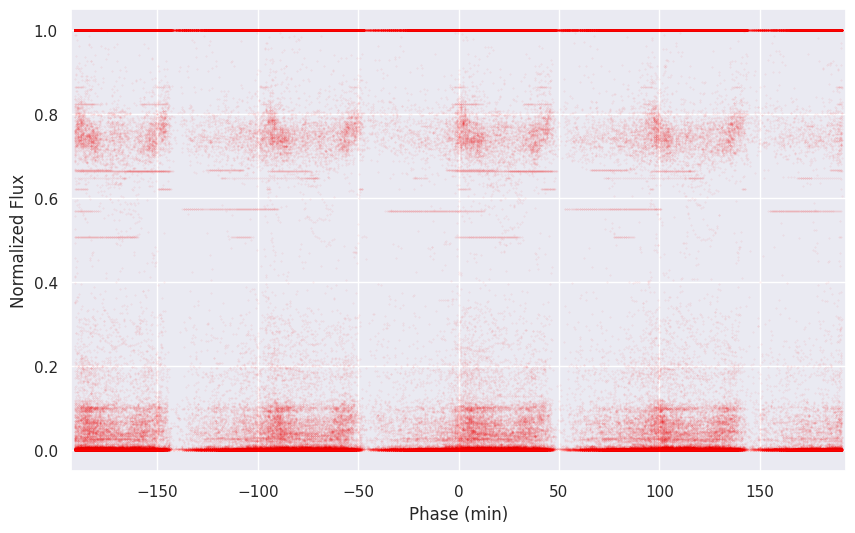

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Archivos de entrada
# archivo_linea = "output_95min.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "variacion_periodicidad/phasefolding_periodicidad_382.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
# data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
# data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
# data_linea['x'] = data_linea['x'] - 158

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# plt.plot(data_linea['x'], data_linea['y'], label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=0.1)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
# plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-193,193)

# Añadir leyenda
# plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_scater_4_periods_sample1.png", format='png', dpi=300)
plt.show()



# 6 Periodos

/tmp/ipykernel_21214/2618537955.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/2618537955.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/2618537955.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


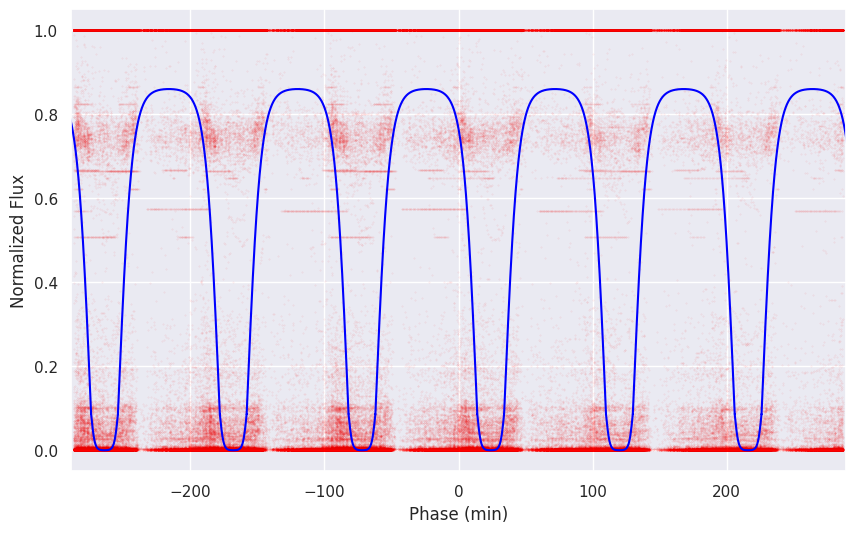

In [198]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_0.86_E76.0_S20.0_m0.99_W10.0_desplazamiento10.0.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "variacion_periodicidad/phasefolding_periodicidad_573.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 350

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=.1)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-289,289)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
#plt.savefig("images/phasefold_jacobi_6_periods_sample1.png", format='png', dpi=300)

plt.show()


/tmp/ipykernel_839/4253205112.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/4253205112.py:12: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


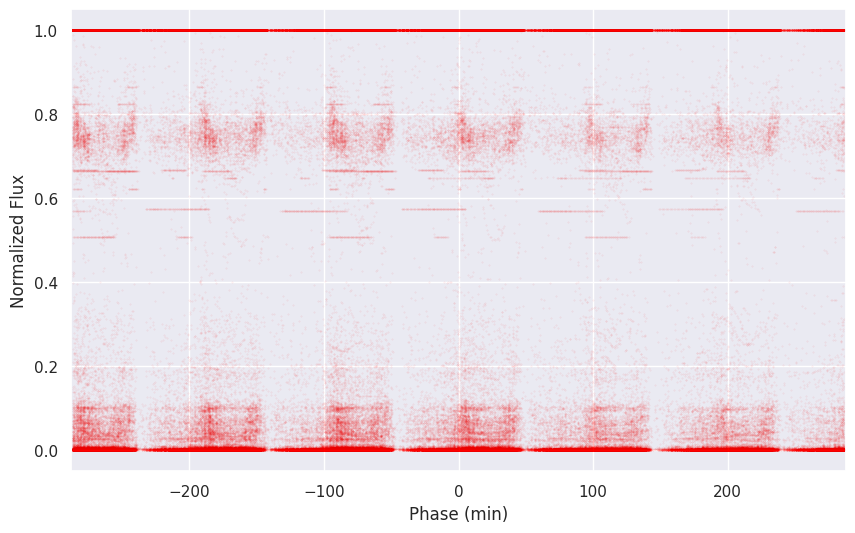

In [135]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Archivos de entrada
# archivo_linea = "output_95min.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "variacion_periodicidad/phasefolding_periodicidad_573.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
# data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
# data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
# data_linea['x'] = data_linea['x'] - 158

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# plt.plot(data_linea['x'], data_linea['y'], label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=0.1)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
# plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-288,288)

# Añadir leyenda
# plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_scater_6_periods_sample1.png", format='png', dpi=300)
plt.show()



/tmp/ipykernel_21214/3855775961.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/3855775961.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


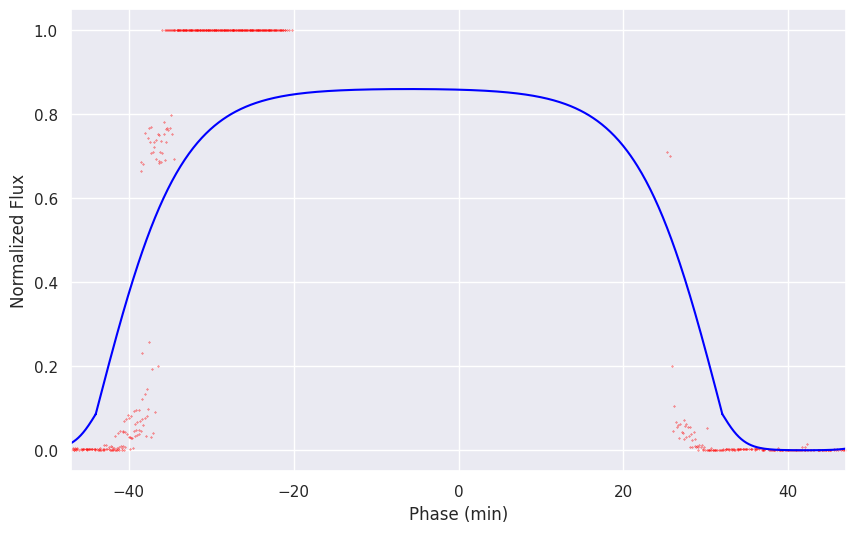

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_0.86_E76.0_S20.0_m0.99_W4.0_desplazamiento10.0.dat"
archivo_scatter = "datos_phasefolding_sagA_570844801.dat.csv"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 236

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=.9)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-47, 47)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_jacobi_sagA_570844801_sample1.png", format='png', dpi=300)

plt.show()


/tmp/ipykernel_21214/3613632787.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


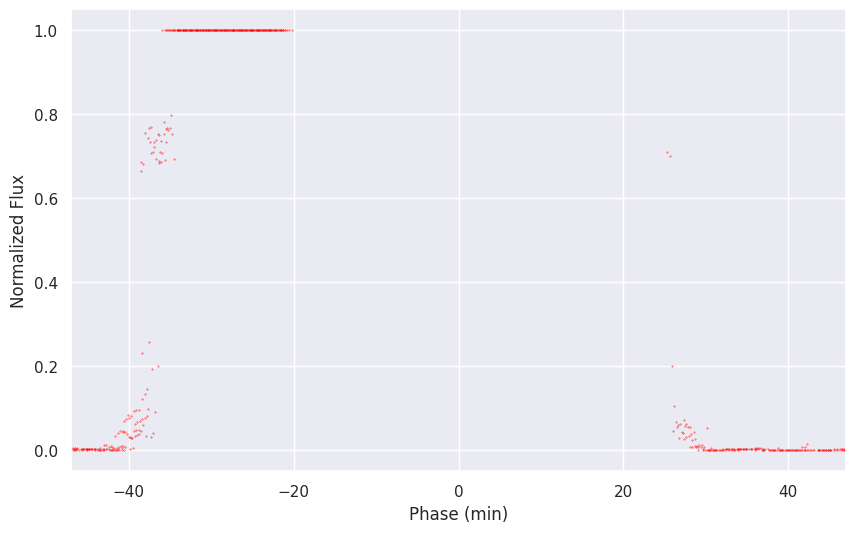

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Archivos de entrada
# archivo_linea = "output_95min.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "datos_phasefolding_sagA_570844801.dat.csv"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
# data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
# data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
# data_linea['x'] = data_linea['x'] - 158

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# plt.plot(data_linea['x'], data_linea['y'], label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=0.9)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
# plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-47,47)

# Añadir leyenda
# plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_sagA_570844801_sample1.png", format='png', dpi=300)
plt.show()



# Light Curve sagA_570844801.dat

/tmp/ipykernel_21214/290289205.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/290289205.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)


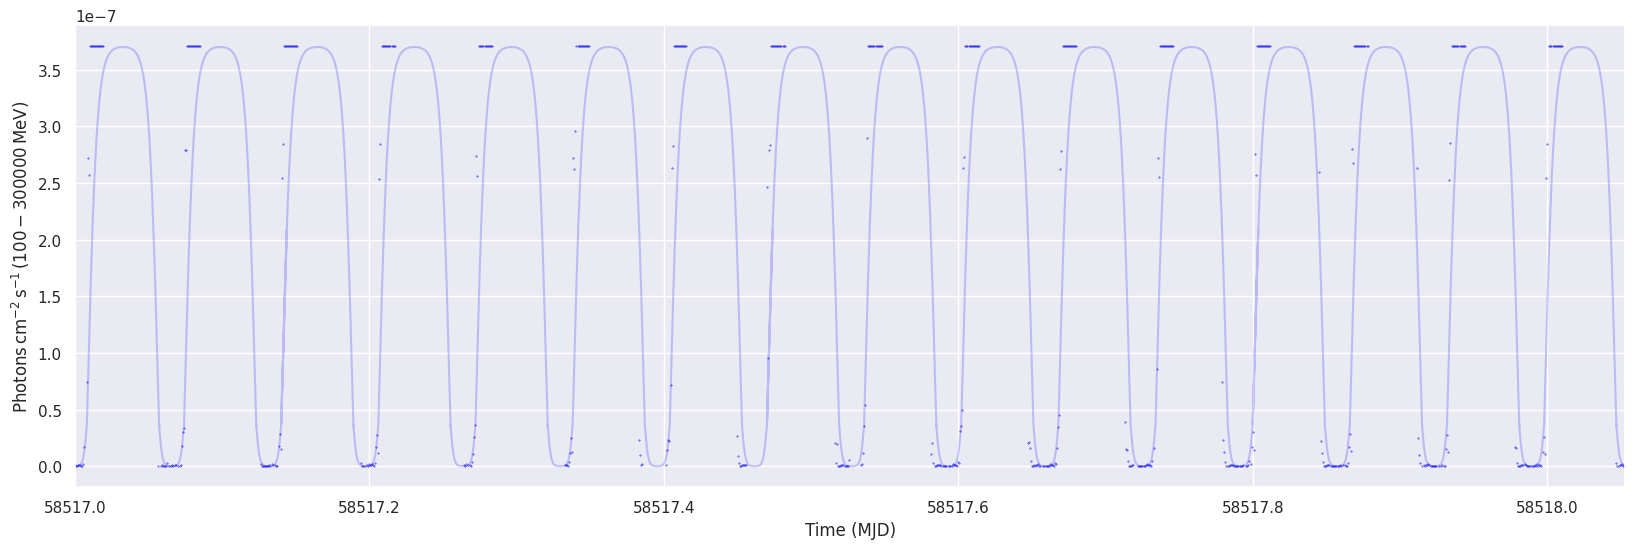

In [211]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_3.7e-07_E0.049_S0.017_m0.99_W20.0_desplazamiento10.0_sort.dat"
archivo_scatter = "sagA_570844801.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] + 58516.81

# Crear la figura y el eje
# plt.figure(figsize=(6.3, 3))
plt.figure(figsize=(20, 6))

# Graficar la línea (con desplazamiento)
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear listas para datos discontinúos
x_discontinuo = []
y_discontinuo = []

# Insertar NaN para crear discontinuidades
for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN si la diferencia es mayor a 1
    if abs(x_vals[i + 1] - x_vals[i]) > 1:
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', alpha=.2)

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=0.1)

# Etiquetas y título
plt.xlabel("Time (MJD)")
plt.ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')

# Configurar el eje x para evitar notación científica
ax = plt.gca()  # Obtener el eje actual
ax.ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
ax.xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks

# Ajustar los límites del eje x si es necesario (opcional)
plt.xlim(58517, 58518.053)

# Añadir leyenda
#plt.legend()

plt.savefig("images/lightcurve_jacobi_sagA_570844801_sample1.png", format='png', dpi=300)
# Mostrar la gráfica
plt.show()


/tmp/ipykernel_21214/3485464573.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/3485464573.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)


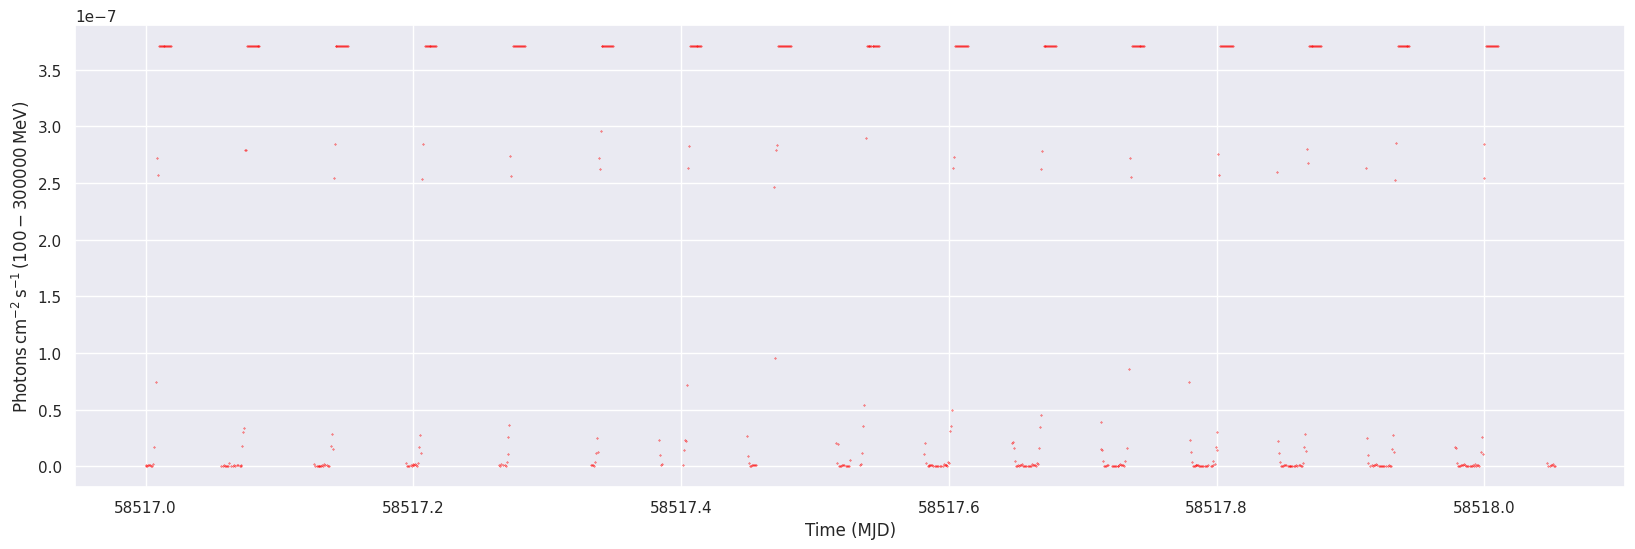

In [212]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_3.7e-07_E0.049_S0.017_m0.99_W20.0_desplazamiento10.0.dat"
archivo_scatter = "sagA_570844801.dat"


# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] + 58516.81

# Crear la figura y el eje
plt.figure(figsize=(20, 6))
# plt.figure(figsize=(6.3, 3))

# ---- Datos para la línea ----
x_vals_linea = data_linea['x'].values
y_vals_linea = data_linea['y'].values

# Ajustar el umbral para filtrar las variaciones pequeñas en 'y'
umbral = 1e-8  # Umbral para evitar líneas horizontales indeseadas

# Filtrar las diferencias pequeñas
diferencias = np.abs(np.diff(y_vals_linea))
indices_validos = np.where(diferencias > umbral)[0]  # Solo tomamos los puntos con diferencias mayores al umbral

# Graficar la línea filtrada
plt.plot(x_vals_linea[indices_validos], y_vals_linea[indices_validos], color='blue', linestyle='-', alpha=0.2)

# ---- Graficar el scatter sin cambios ----
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=0.1)

# Etiquetas y título
plt.xlabel("Time (MJD)")
plt.ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')

# Configurar el eje x para evitar notación científica
ax = plt.gca()  # Obtener el eje actual
ax.ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
ax.xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks

# Ajustar los límites del eje x si es necesario (opcional)

# Añadir leyenda
# plt.legend()

plt.savefig("images/lightcurve_sagA_570844801_sample1.png", format='png', dpi=300)
# Mostrar la gráfica
plt.show()
